# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание проекта

- Данные находятся в трёх файлах:
1. gold_recovery_train_new.csv — обучающая выборка;
2. gold_recovery_test_new.csv — тестовая выборка;
3. gold_recovery_full_new.csv — исходные данные.

- Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
- Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
- Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
- В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.


# Описание данных

#### Технологический процесс
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - Xanthate **— ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

#### Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

#### Наименование признаков
- Наименование признаков должно быть такое:
    - [этап].[тип_параметра].[название_параметра]

- Пример: rougher.input.feed_ag

#### Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики
#### Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики


# Расчёт эффективности


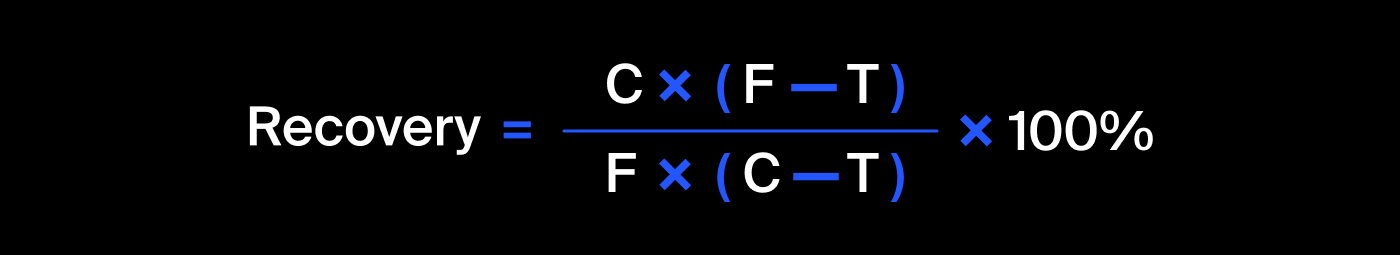

In [1]:
from IPython.display import Image
Image("/Users/mmaximmaximovgmail.com/Desktop/DS/second_full_project/Image.png")

# Метрика качества

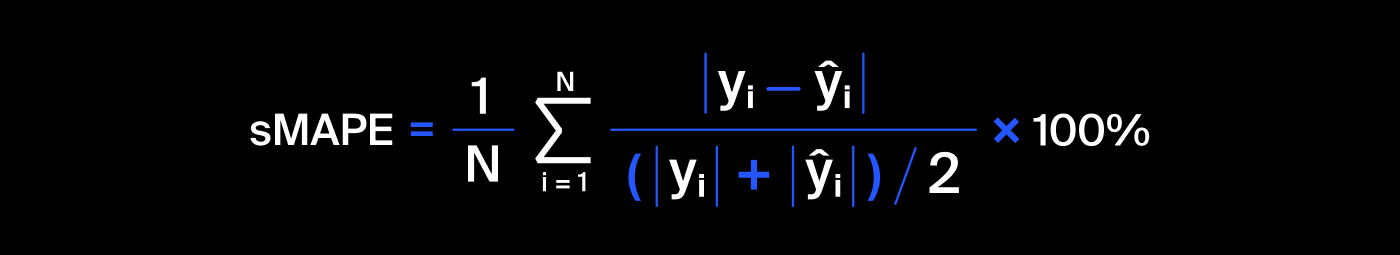

In [2]:
Image("/Users/mmaximmaximovgmail.com/Desktop/DS/second_full_project/Image2.png")

# Итоговое sMAPE

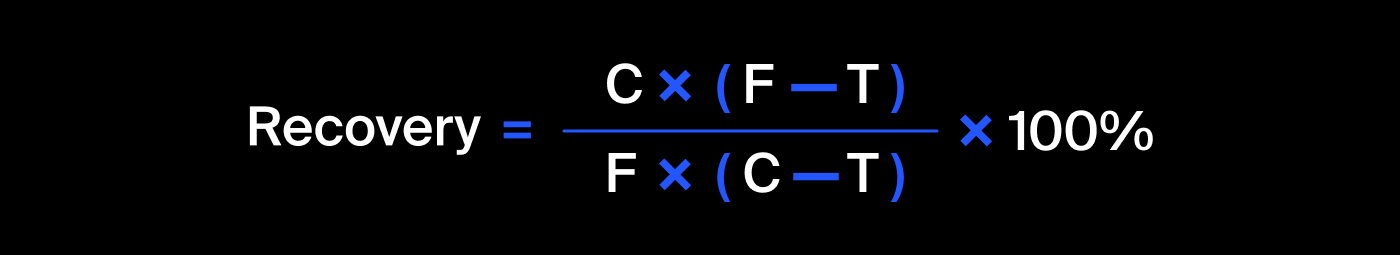

In [3]:
Image("/Users/mmaximmaximovgmail.com/Desktop/DS/second_full_project/Image.png")

# Инструкция по выполнению проекта
# 1. Подготовьте данные

### 1.1. Откройте файлы и изучите их.

In [4]:
# Эксперимент
!pip install catboost

In [5]:
from catboost import CatBoostRegressor

In [6]:
# Импортируем все нужные инстурменты для дальнейшего анализа 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Открываем таблицу двумя путями

# Обучающая выборка
server_train = 'gold_recovery_train_new.csv'
local_train = '/Users/mmaximmaximovgmail.com/Desktop/DS/second_full_project/gold_recovery_train_new.csv'
try:
    gold_train = pd.read_csv(server_train)
except:
    gold_train = pd.read_csv(local_train)

# Тестовая выборка
server_test = 'gold_recovery_test_new.csv'
local_test = '/Users/mmaximmaximovgmail.com/Desktop/DS/second_full_project/gold_recovery_test_new.csv'
try:
    gold_test = pd.read_csv(server_test)
except:
    gold_test = pd.read_csv(local_test)
    
# Исходные данные
server_full = 'gold_recovery_full_new.csv'
local_full = '/Users/mmaximmaximovgmail.com/Desktop/DS/second_full_project/gold_recovery_full_new.csv'
try:
    gold_full = pd.read_csv(server_full)
except:
    gold_full = pd.read_csv(local_full)

In [8]:
display(gold_train.head())
display(gold_train.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

In [9]:
display(gold_test.head())
display(gold_test.info())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

In [10]:
display(gold_full.head())
display(gold_full.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [11]:
# Далее функция с расчетами по формуле Recovery
def rec(i):
    C, F, T = i['rougher.output.concentrate_au'], i['rougher.input.feed_au'], i['rougher.output.tail_au']
    recovery = (((C) * ((F) - (T)))/ (((F) * ((C) - (T))))) * 100
    return recovery

# Теперь в обучающей выборке удалим несколько столбцов и сравним с колонкой rougher.output.recovery
# subset нужен, чтобы сразу несколько столбцов удалить
# apply позволяет применять созданную мною функцию
train = gold_train.dropna(subset=['rougher.output.recovery','rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au'], axis=0).apply(rec, axis=1)
# Расчитываю значение MAE
mae_train = mean_absolute_error(gold_train.dropna(subset=['rougher.output.recovery',
                                                          'rougher.output.concentrate_au',
                                                          'rougher.input.feed_au',
                                                          'rougher.output.tail_au'])['rougher.output.recovery'], train)
print('MAE:', mae_train)

MAE: 9.73512347450521e-15


### Мини вывод
- Полученное значение довольное маленькое, поэтому эффективность обогащения расситана правильно

### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [12]:
# Создам функцию которая найдет признак в обучающей выборе и нет в тестовой выборке
# Использую set чтобы содержать уникальные и неповторяющиеся элементы
def test(one, two):
    return set(one.columns.to_list()) - set(two.columns.to_list())

# Находим эти признаки и вывыодим ифнормацию (но мне нужен только тип)
test_invalid = test(gold_train, gold_test)
print(gold_train[test_invalid].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.output.tail_ag                              14148 non-null  float64
 1   rougher.calculation.sulfate_to_au_concentrate       14148 non-null  float64
 2   rougher.output.tail_sol                             14149 non-null  float64
 3   primary_cleaner.output.tail_pb                      14134 non-null  float64
 4   primary_cleaner.output.tail_au                      14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.concentrate_ag                         14148 non-null  float64
 7   rougher.calculation.floatbank11_sulfate_to_au_feed  14148 non-null  float64
 8   primary_cleaner.output.concentrate_pb               14063 non-null  float64


### Мини вывод
- Первое, что бросается в глаза это у всех тип float64
- В 88% таблицы в типе параметров указывается output (параметры продукта)
- В остальных 12% указывается calculation ( расчетные характеристики )
- Причиной того, что calculation мало, наверно они расчитываются когда процесс будет полностью пройден

### 1.4. Проведите предобработку данных.

In [13]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [14]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [15]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [16]:
# Заменяем тип данных в date в обучающей и тестовой выборке
gold_train['date'] = pd.to_datetime(gold_train['date'], format='%Y-%m-%dT%H:%M:%S')
gold_test['date'] = pd.to_datetime(gold_test['date'], format='%Y-%m-%dT%H:%M:%S')
gold_full['date'] = pd.to_datetime(gold_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
gold_test.shape

(5290, 53)

In [18]:
# Перед тем как создавать модель для тестовой выборки, нужно добавить столбцы 
# rougher.output.recovery и final.output.recovery из таблицы исходных данных
# Делаю через merge() по столбцу date, так как date есть в обоих данных

gold_test = gold_test.merge(gold_full.loc[:,['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')
gold_test.shape
#COL = ['date', 'rougher.output.recovery', 'final.output.recovery']
#gold_test = gold_test.merge(gold_full[COL].loc[gold_test.index], on='date', how='left')
#gold_test.shape

(5290, 55)

In [19]:
# Удалим пропуски в обучающей и тестовой выборке
# Так как в условие написанно, что соседние параметры схожи, то заполним их методом 'ffill'
gold_train = gold_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
gold_train = gold_train.sort_values(ascending=True, by='date').fillna(method='ffill')
gold_test = gold_test.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
gold_test = gold_test.sort_values(ascending=True, by='date').fillna(method='ffill')

# 2. Проанализируйте данные

### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [20]:
before_au = gold_train['rougher.input.feed_au'].mean()
before_ag = gold_train['rougher.input.feed_ag'].mean()
before_pb = gold_train['rougher.input.feed_pb'].mean()
display(f'Концентрация до флотации: Золото - {before_au:.2f}, Серебро - {before_ag:.2f}, Свинец - {before_pb:.2f}')

after_au = gold_train['rougher.output.concentrate_au'].mean()
after_ag = gold_train['rougher.output.concentrate_ag'].mean()
after_pb = gold_train['rougher.output.concentrate_pb'].mean()
display(f'Концентрация после флотации: Золото - {after_au:.2f}, Серебро - {after_ag:.2f}, Свинец - {after_pb:.2f}')

clean_au = gold_train['primary_cleaner.output.concentrate_au'].mean()
clean_ag = gold_train['primary_cleaner.output.concentrate_ag'].mean()
clean_pb = gold_train['primary_cleaner.output.concentrate_pb'].mean()
display(f'Концентрация после первого этапа очистки: Золото - {clean_au:.2f}, Серебро - {clean_ag:.2f}, Свинец - {clean_pb:.2f}')

final_au = gold_train['final.output.concentrate_au'].mean()
final_ag = gold_train['final.output.concentrate_ag'].mean()
final_pb = gold_train['final.output.concentrate_pb'].mean()
display(f'Концентрация финальная: Золото - {final_au:.2f}, Серебро - {final_ag:.2f}, Свинец - {final_pb:.2f}')


'Концентрация до флотации: Золото - 7.87, Серебро - 8.58, Свинец - 3.51'

'Концентрация после флотации: Золото - 19.44, Серебро - 11.78, Свинец - 7.66'

'Концентрация после первого этапа очистки: Золото - 32.39, Серебро - 8.20, Свинец - 9.57'

'Концентрация финальная: Золото - 44.00, Серебро - 5.14, Свинец - 10.13'

### Мини вывод
- Видим, как после каждого этапа обработки золото и свинец вырастали в концентрации
- А вот серебро напротив после флотации выросло а уже после чисток упало

## 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

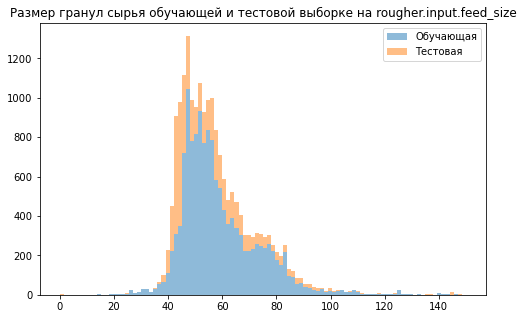

In [21]:
x = gold_train['rougher.input.feed_size']
y = gold_test['rougher.input.feed_size']

fig = plt.figure(figsize=(8,5))
plt.hist(
    [x, y], 
    bins=100,
    range=(0, 150),
    stacked=True,
    alpha=0.5
)
plt.title('Размер гранул сырья обучающей и тестовой выборке на rougher.input.feed_size')
plt.legend(('Обучающая', 'Тестовая'))

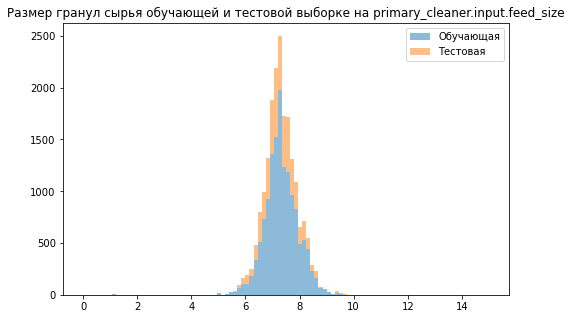

In [22]:
x = gold_train['primary_cleaner.input.feed_size']
y = gold_test['primary_cleaner.input.feed_size']

fig = plt.figure(figsize=(8,5))
plt.hist(
    [x, y], 
    bins=100,
    range=(0, 15),
    stacked=True,
    alpha=0.5,
)
plt.title('Размер гранул сырья обучающей и тестовой выборке на primary_cleaner.input.feed_size')
plt.legend(('Обучающая', 'Тестовая'))

### Мини вывод 
- По двум гистограммам видно, что распредление обучающей и тестовой выборки схожи

### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Text(0.5, 1.0, 'До флотации')

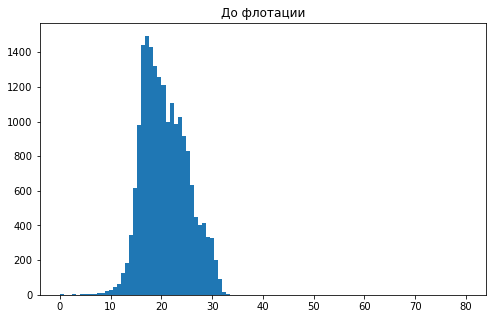

In [23]:
# Сумарная концентрация всех вещество до флотации
gold_full['rougher_bef'] = (
    gold_full['rougher.input.feed_au']+
    gold_full['rougher.input.feed_ag']+
    gold_full['rougher.input.feed_pb']
)

fig = plt.figure(figsize=(8,5))
plt.hist(
    gold_full['rougher_bef'],
    bins=100,
    stacked=True,
    range=(0,80),
)
plt.title('До флотации')

Text(0.5, 1.0, 'После флотации')

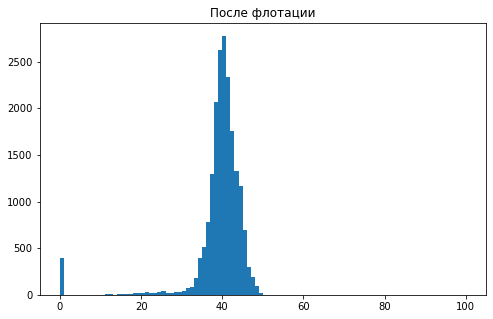

In [24]:
# Сумарная концентрация всех вещество после флотации
gold_full['rougher_aft'] = (
    gold_full['rougher.output.concentrate_au']+
    gold_full['rougher.output.concentrate_ag']+
    gold_full['rougher.output.concentrate_pb']
)

fig = plt.figure(figsize=(8,5))
plt.hist(
    gold_full['rougher_aft'],
    bins=100,
    stacked=True,
    range=(0,100)
)
plt.title('После флотации')

Text(0.5, 1.0, 'После первичной очистки')

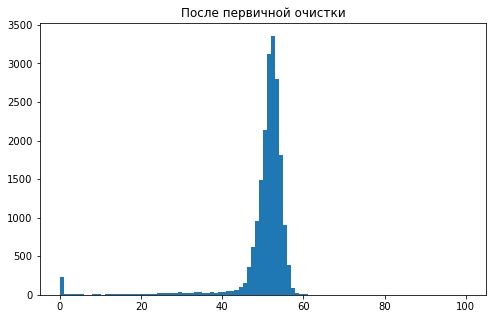

In [25]:
# Сумарная концентрация всех вещество после первичной очистки
gold_full['rougher_prim'] = (
    gold_full['primary_cleaner.output.concentrate_au']+
    gold_full['primary_cleaner.output.concentrate_ag']+
    gold_full['primary_cleaner.output.concentrate_pb']
)

fig = plt.figure(figsize=(8,5))
plt.hist(
    gold_full['rougher_prim'],
    bins=100,
    stacked=True,
    range=(0,100)
)
plt.title('После первичной очистки')

Text(0.5, 1.0, 'Финальная')

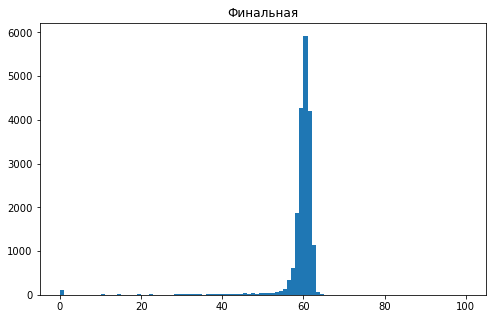

In [26]:
# Сумарная концентрация всех вещество финальная
gold_full['rougher_fin'] = (
    gold_full['final.output.concentrate_au']+
    gold_full['final.output.concentrate_ag']+
    gold_full['final.output.concentrate_pb']
)

fig = plt.figure(figsize=(8,5))
plt.hist(
    gold_full['rougher_fin'],
    bins=100,
    stacked=True,
    range=(0,100)
)
plt.title('Финальная')

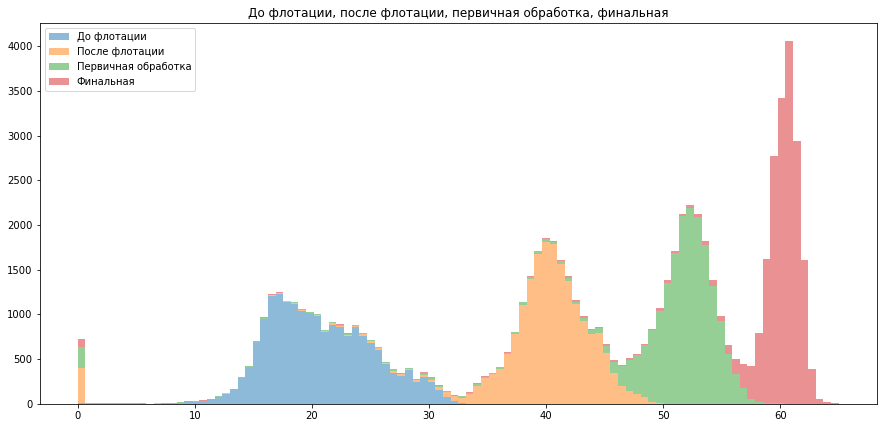

In [27]:
fig = plt.figure(figsize=(15,7))
plt.hist(
    [gold_full['rougher_bef'], gold_full['rougher_aft'], gold_full['rougher_prim'], gold_full['rougher_fin']],
    bins=100,
    stacked=True,
    alpha=0.5
)
plt.title('До флотации, после флотации, первичная обработка, финальная')
plt.legend(('До флотации', 'После флотации', 'Первичная обработка', 'Финальная'))

In [28]:
# Заметил что имеются выбросы в районе нулевого значений, от них нужно избавится
gold_full_sec = gold_full.copy
gold_full_sec = gold_full[(gold_full['rougher_bef'] > 1) &
                     (gold_full['rougher_aft'] > 1) &
                     (gold_full['rougher_prim'] > 1) &
                     (gold_full['rougher_fin'] > 1)]

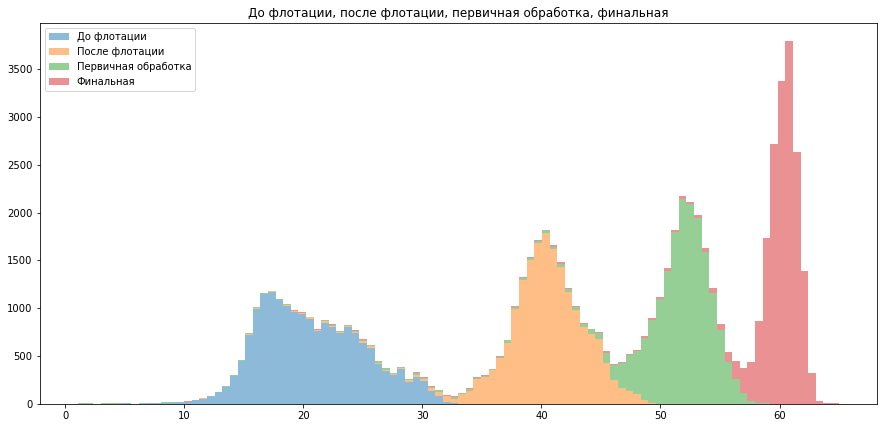

In [29]:

fig = plt.figure(figsize=(15,7))
plt.hist(
    [gold_full_sec['rougher_bef'], gold_full_sec['rougher_aft'], gold_full_sec['rougher_prim'], gold_full_sec['rougher_fin']],
    bins=100,
    stacked=True,
    alpha=0.5
)
plt.title('До флотации, после флотации, первичная обработка, финальная')
plt.legend(('До флотации', 'После флотации', 'Первичная обработка', 'Финальная'))

### Мини вывод 
- Выявили во всех сумарных концентрация на каждом периоде выброс в районе 0 и удалили их, теперь гистограмма выглядит красивее

# 3. Постройте модель


### 3.1. Напишите функцию для вычисления итоговой sMAPE.

### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [30]:
# Функция для sMAPE 
# np.mean() это средне арифметическое значение
def smape(y1, y2):
    s = np.mean(abs(y1-y2)/((abs(y1)+abs(y2))/2))
    sMAPE = s * 100
    return sMAPE

In [31]:
# Функция для итоговой smape
def total_smape(y_true,y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred))/2
    smape = ((numerator/denominator)*100).sum() / len(y_pred)
    return 0.25*smape[0] + 0.75*smape[1]

In [32]:
smape_scorer = make_scorer(total_smape, greater_is_better=False)

In [33]:
# Перед тем как обучить модель, нужно удалить столбцы из обучающей выборки, которых нет в тестовой
test_mis = test(gold_train, gold_test)
# Нашли отсутствующие столбцы, осталось их удалить
print(gold_train[test_mis].dtypes)

rougher.output.tail_ag                                float64
rougher.calculation.sulfate_to_au_concentrate         float64
rougher.output.tail_sol                               float64
primary_cleaner.output.tail_pb                        float64
primary_cleaner.output.tail_au                        float64
final.output.tail_ag                                  float64
final.output.concentrate_ag                           float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
primary_cleaner.output.concentrate_pb                 float64
final.output.tail_sol                                 float64
final.output.concentrate_pb                           float64
secondary_cleaner.output.tail_pb                      float64
rougher.output.tail_pb                                float64
primary_cleaner.output.tail_sol                       float64
primary_cleaner.output.concentrate_au                 float64
primary_cleaner.output.tail_ag                        float64
final.ou

In [34]:
# Не создавая новую перменную, буду делать все с первичной
gold_train = gold_train.drop(test_mis, axis='columns')

In [35]:
# Пытался удалить столбец date
gold_train = gold_train.drop(columns=['date'], axis=1)
gold_test = gold_test.drop(columns=['date'], axis=1)

In [36]:
# Сначала разобьем на две выборки обучающую и тестовую
COL_1 = ['rougher.output.recovery', 'final.output.recovery']
# Обучающая 
feature_train = gold_train.drop(COL_1, axis='columns')
target_train = gold_train[COL_1]


In [37]:
# Тестовая 
COL_2 = ['rougher.output.recovery', 'final.output.recovery']
feature_test = gold_test.drop(COL_2, axis='columns')
target_test = gold_test[COL_2]

In [38]:
# Дерево
params = {
    'max_depth': range(2, 11)
}

model = DecisionTreeRegressor(random_state=12345)
score = GridSearchCV(model, params, scoring=smape_scorer, cv=5)
score.fit(feature_train, target_train)
print('Значение sMAPE для дерева: {} с данными: {}'.format(-score.best_score_, score.best_params_))


Значение sMAPE для дерева: 10.952668842678056 с данными: {'max_depth': 5}


In [39]:
# Лес
# Лучшее значение для леса показало n_estimators - 40
params = {
    'n_estimators':range(10, 51, 10)
}
model = RandomForestRegressor(random_state=12345, max_depth=5)
score = GridSearchCV(model, params, scoring=smape_scorer, cv=5)
score.fit(feature_train, target_train)
print('Значение sMAPE для леса: {} с данными: {}'.format(-score.best_score_, score.best_params_))

Значение sMAPE для леса: 10.347925546115494 с данными: {'n_estimators': 40}


In [40]:
# Линейная регрессия
model = LinearRegression()
model.fit(feature_train, target_train)
score = cross_val_score(model, feature_train, target_train, cv=5, scoring=smape_scorer).mean()
print('Значение sMAPE для линейной регрессии:', -score)

Значение sMAPE для линейной регрессии: 12.384596104847144


### Мини вывод 
- Лучший показатель на модели показала себя случайный лес
- Но теперь нужно проверить на тестовой выборке

In [42]:
# Тестовая
model = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=40)
model.fit(feature_train, target_train)
pred = model.predict(feature_test)
print('Тестовое значение smape: ', total_smape(target_test, pred))

Тестовое значение smape:  9.136050449695146


In [43]:
# Сравнение с DummyRegressor
dummy = DummyRegressor(strategy='median')
dummy.fit(feature_train, target_train)
dummy_pred = dummy.predict(feature_test)
print('Dummy значение smape: ', total_smape(target_test, dummy_pred))

Dummy значение smape:  9.479919198122861


# 4. Вывод

- Шаг 1
    - Открыл все нужные DF и сделал первичный анализ по данным
    - Затем нашел значение MAE и убедился, что обогощение расчитанно правильно
    - Далее было проведенная переработка всех трех выборок, сначала нашли пропущенные столбцы обущающей и тестовой выборки, затем привели в порядок тип данных, добавил два столбца в тестовую выборку и под конец заполни все пустые значение и отсартировал список по порядку
 
- Шаг 2
    - Проанализировал концентрацию трех материалов
    - Сравнил распределения гранул сырья на train и test выборке
    - Исследовал и начертил концетрнацих всех веществ на разных стадиях
- Шаг 3
    - Построил 3 модели
    - Выявил, что лучшей моделью это случайный лес и подтвержденным в тестовой выборке
    - Сравнил с DummyRegressor